/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

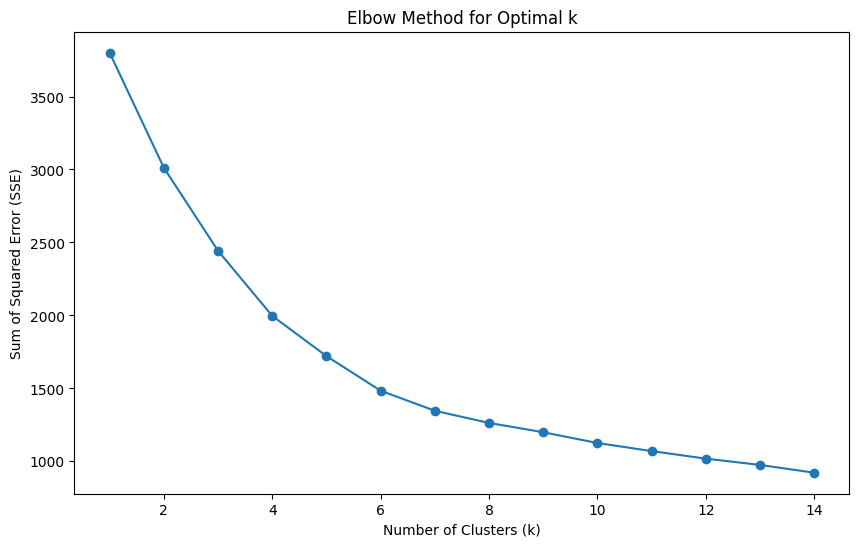

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


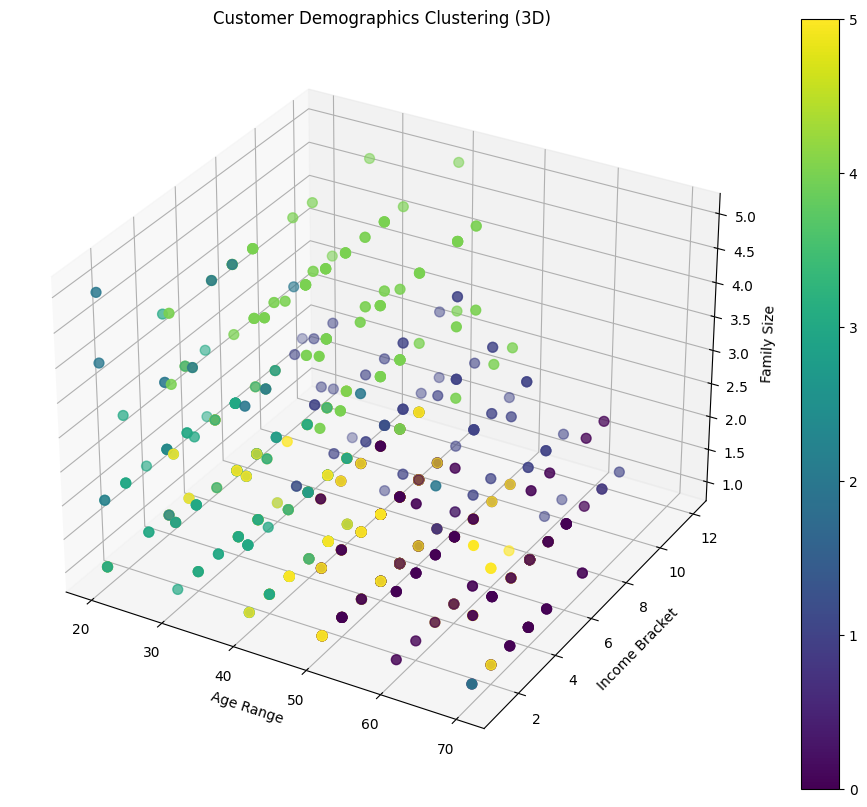

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# data_path = 'C:/Users/Kilo/OneDrive/Desktop/archive/customer_demographics.csv'  # Replace 'your_data.csv' with the actual path
df = pd.read_csv('customer_demographics.csv')

df['age_range'] = df['age_range'].replace(['18-25', '26-35', '36-45', '46-55', '56-70', '70+'], [20, 30, 40, 50, 60, 70])  # Replace age ranges with representative numerical values
df['age_range'] = df['age_range'].astype(float)  # Convert the column to float

# Convert '5+' to '5' in 'family_size' column
df['family_size'] = df['family_size'].replace('5+', '5')
df['family_size'] = df['family_size'].astype(int)  # Convert the column to integer

# Drop unnecessary columns
df = df.drop(['marital_status', 'no_of_children'], axis=1)

# Standardize the data (important for KMeans)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine optimal number of clusters using the Elbow method
sse = []
for k in range(1, 15):  # Try different cluster numbers
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Set optimal k to 6 as requested
optimal_k = 6

# Apply KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using 'age_range', 'income_bracket', and 'family_size' in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['age_range'], df['income_bracket'], df['family_size'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_title('Customer Demographics Clustering (3D)')
ax.set_xlabel('Age Range')
ax.set_ylabel('Income Bracket')
ax.set_zlabel('Family Size')

# Add a colorbar to show cluster mapping
plt.colorbar(scatter)

plt.show()

df['Cluster'] = kmeans.labels_
output_path = '/content/customer_demographics_cluster.csv'
df.to_csv(output_path, index=False)
